In [1]:
import pandas as pd

In [2]:
!pip install contractions pyspellchecker cucco nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.4 MB/s eta 0:00:00
  Created wheel for cucco: filename=cucco-2.2.1-py3-none-any.whl size=55392 sha256=b306208353a3a1c86c89a1f3465de3a018424713aa1d676a63f47c2540f86364
  Stored in directory: /root/.cache/pip/wheels/6a/b5/8c/7ed19b26b239ee874ca639200af3c5b92ac31ff427b404e2a3
Successfully built cucco


In [3]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd "gdrive/MyDrive/Grupo 1 - Processamento de Linguagem Natural/Data"

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1ub11KA5pjUO4RCNqv5VFfBB4Tnv21ooN/Grupo 1 - Processamento de Linguagem Natural/Data


In [4]:
%ls 'csv base'

augusto-metacritic-data-new.csv  desatualizados/                  ricardo-metacritic-data-new.csv
badib-metacritic-data-new.csv    leticia-metacritic-data-new.csv


In [5]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [26]:
csv_names = ["augusto-metacritic-data-new.csv","badib-metacritic-data-new.csv","ricardo-metacritic-data-new.csv","leticia-metacritic-data-new.csv"]

In [27]:
csv_names[1:]

['badib-metacritic-data-new.csv',
 'ricardo-metacritic-data-new.csv',
 'leticia-metacritic-data-new.csv']

In [43]:
df = pd.read_csv("csv base/"+csv_names[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie name  1620 non-null   object
 1   Review      1620 non-null   object
 2   Created at  1620 non-null   object
 3   Score       1620 non-null   int64 
 4   Genre       1620 non-null   object
dtypes: int64(1), object(4)
memory usage: 63.4+ KB


In [44]:
for files in csv_names[1:]:
  df_aux = pd.read_csv("csv base/"+files)
  df = pd.concat([df,df_aux])
df = df.reset_index(drop=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie name  6480 non-null   object 
 1   Review      6480 non-null   object 
 2   Created at  6480 non-null   object 
 3   Score       6480 non-null   float64
 4   Genre       6480 non-null   object 
dtypes: float64(1), object(4)
memory usage: 253.2+ KB


In [46]:
df["Genre"].value_counts()

Mistery      540
Family       540
Horror       540
Fantasy      540
Drama        540
Thriller     540
sci-fi       540
sport        540
comedy       540
Crime        540
Adventure    540
Animation    540
Name: Genre, dtype: int64

In [48]:
df["Movie name"].value_counts()

Arrival                                                                 90
Lightyear                                                               90
The Twilight Saga: Breaking Dawn - Part 1                               90
Gone Girl                                                               90
The Hunger Games: Mockingjay - Part 1                                   90
Glass                                                                   90
Fifty Shades of Grey                                                    90
Trainwreck                                                              90
Jurassic World Dominion                                                 90
Sausage Party                                                           90
Minions                                                                 90
Ralph Breaks the Internet                                               90
The Super Mario Bros. Movie                                             90
Spider-Man: Across the Sp

In [49]:
print("Text:\n",df.Review.str.len().max())

Text:
 5000


In [50]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the "text" column containing strings.
def barplot_len(df,column):

    max_len = df[column].str.len().max()

    # Step 1: Calculate the length of each string in the "text" column.
    df['text_length'] = df[column].apply(len)

    # Step 2: Create bins for different length ranges from 50 to 300 with an increment of 50.
    bins = list(range(0, max_len+501, 250))

    # Step 3: Use pd.cut to categorize the text lengths into the bins.
    df['length_range'] = pd.cut(df['text_length'], bins=bins, right=False)

    # Step 4: Count the number of samples in each length range.
    length_counts = df['length_range'].value_counts().sort_index()

    # Step 5: Plot the bar graph.
    plt.bar(length_counts.index.astype(str), length_counts.values, color="c")
    plt.xlabel('Text Length Range')
    plt.ylabel('Number of Samples')
    plt.title('Number of Samples in Different Text Length Ranges')
    plt.xticks(rotation=45)

    # Step 6: Format the y-axis tick labels as plain integers.
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


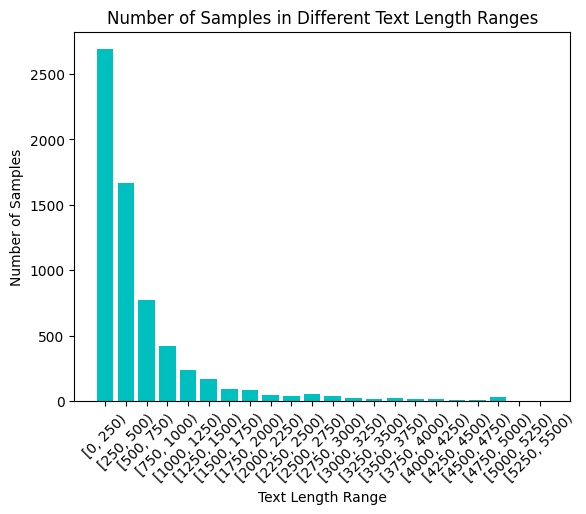

In [51]:
barplot_len(df,"Review")

In [52]:
df = df.drop(columns=["length_range","text_length"])

## Processamento dos textos:
Expandir contrações:
Contractions, https://github.com/kootenpv/contractions

Spell corrector:
PySpellChecker, https://pyspellchecker.readthedocs.io/en/latest/quickstart.html

Remover espaços em branco extra, remover emojis, pontuação:
Cucco, https://davidmogar.github.io/cucco.io/documentation.html


Tokenização:
NLTK, https://www.nltk.org/api/nltk.tokenize.html


### Expandir contrações

In [53]:
import contractions
contractions.fix("you're happy now")

'you are happy now'

Exemplo de amostra antes da contração:

In [54]:
df.head(50)

,Movie name,Review,Created at,Score,Genre
0,Arrival,Denis villeneuve shows us all his talent in this film which is for me his best : science fiction is used in the best way. I have rarely been so taken by the mystery of a film during my first cinema session.,"OCT 3, 2022",10.0,Mistery
1,Arrival,"Amy Adams gives a superb performance in what could be called ""Independence Day with a Brain."" Denis Villeneuve delivers an intentional methodically paced script with the sort of intelligence, nuance, and confidence that feels wholly refreshing.","MAR 7, 2022",10.0,Mistery
2,Arrival,"This movie is not for everyone. If you wanted a science fiction action blockbuster then you will be disappointed. However it is one of the most brilliant plots in scifi. I won’t spoil the details but once you understand the twist it’s just magnificent. It is a movie worth to discuss with friends and very memorable because it does something completely different. The ideas for follow up stories are basically endless. It is based on the book “The story of her life” if I am correct. Also all actors were the right choices for their respected rolls. I think this will be a forgotten masterpiece because it is not mainstream enough. Sorry for not going in in details, but it will ruin the movie. Think about the twist in “The sixth sense”. If someone spoiled it for you the movie would be less good (or a lesser experience?).","DEC 6, 2019",10.0,Mistery
3,Arrival,"Arrival is one of my favorite Sci Fi movies of all time. The movie doesn't need flashy action sequences or superficial Drama to deliver a thoughtful and emotional experience. Even the ""plot twist"" if you may call it that is in clear service of the story and not just a plot twist for the sake of it. Arrival manages to connect with me every time I watch it. I think this is some of the best that Sci Fi has to offer.","APR 3, 2020",10.0,Mistery
4,Arrival,"I don't think this movie is about that ""what makes us human"". Personally I think it is about creating your own reality. The whole movie developes around the ability of a character to understand a language. In a way, Adams' character is a child (humanity) learning to speak. She has to go through all the tribulations of learning a new language, a powerful one at that. The premise is quite interesting and it took me two views to get it: Your language (the way you express what you think) determines your reality. They even mention it at the beginning of the movie, with the Sapir-Whorf theory. This is by far a very metaphysical proposal, and a very adecuate one at that, one that has been told to us by great master of ancient (""For by your words you will be justified, and by your words you will be condemned""). In a way, language IS reality, it is the only way we have to describe it and thus create it. So it would make sense that a more powerful language would create a different, more powerful reality. In the movie, learning the aliens' language would opne the doors of time and space for you, and this can be wither a weapon (as first understood by humans) or a gift, as later realized by Adams. Of course the ability to thread between past, present and future could be a powerful weapon, or a great gift. Once she realizes this, it is quite interesting that she still chooses to have her baby, aware of the outcome, but the most important choice she makes, while having the ability to visit the past or future, is to live in the present. Powerful message indeed. So now you know, choose your words carefully.","MAR 2, 2020",8.0,Mistery
5,Arrival,"Arrival is a sci-fi film only in presentation, as the film explores deeper themes of human communication and aggressiveness. While Arrival’s initial presentation may seem jarring and somewhat flawed, as the movie progresses and the twist is revealed, the editing choices and the pseudo-confusing sequencing end up contributing to the movie's meaning as a larger whole. Arrival explores various linguistic and psychological theories an

In [55]:
df["Review"][47]

"While I thought it was a great story with good acting, the movie is extremely slow. It bored me a lot, I wouldn't watch it again and I don't think it deserved to be among the best films."

In [56]:
contractions.fix(df["Review"][47])

'While I thought it was a great story with good acting, the movie is extremely slow. It bored me a lot, I would not watch it again and I do not think it deserved to be among the best films.'

Conclusão:

- "Would've" => "Would have"

- "Isn't" => "Is not"

- "Don't" => "Do not"

Aplicando no dataframe inteiro:

In [57]:
df["Review"] = [contractions.fix(review_text) for review_text in df["Review"]]

Resultado do exemplo no dataframe modificado:

In [58]:
df["Review"][47]

'While I thought it was a great story with good acting, the movie is extremely slow. It bored me a lot, I would not watch it again and I do not think it deserved to be among the best films.'

### Limpeza de ruídos

Removendo emojis, urls, emails, sinais de pontuação e espaços em branco extras

Exemplo de código

In [59]:
from cucco import Cucco

cucco = Cucco()

normalizations = [
    ('replace_punctuation', {'replacement': ' '}),
    'remove_extra_whitespaces'
]

print(cucco.normalize('Who let the cucco out www.a.com ♥ (:?',normalizations))

Who let the cucco out www a com ♥    


Aplicação no dataframe

In [60]:
normalizations = [
    ('replace_emojis', {'replacement': ' '}),
    ('replace_urls', {'replacement': ' '}),
    ('replace_email', {'replacement': ' '}),
    ('replace_punctuation', {'replacement': ' '}),
    'remove_extra_whitespaces'
]

df["Review"] = [cucco.normalize(review_text,normalizations) for review_text in df["Review"]]
df["Review"] = df["Review"].str.replace(r'[^\w\s]', '',regex=True)

In [61]:
df.head()

,Movie name,Review,Created at,Score,Genre
0,Arrival,Denis villeneuve shows us all his talent in this film which is for me his best science fiction is used in the best way I have rarely been so taken by the mystery of a film during my first cinema session,"OCT 3, 2022",10.0,Mistery
1,Arrival,Amy Adams gives a superb performance in what could be called Independence Day with a Brain Denis Villeneuve delivers an intentional methodically paced script with the sort of intelligence nuance and confidence that feels wholly refreshing,"MAR 7, 2022",10.0,Mistery
2,Arrival,This movie is not for everyone If you wanted a science fiction action blockbuster then you will be disappointed However it is one of the most brilliant plots in scifi I will not spoil the details but once you understand the twist it is just magnificent It is a movie worth to discuss with friends and very memorable because it does something completely different The ideas for follow up stories are basically endless It is based on the book The story of her life if I am correct Also all actors were the right choices for their respected rolls I think this will be a forgotten masterpiece because it is not mainstream enough Sorry for not going in in details but it will ruin the movie Think about the twist in The sixth sense If someone spoiled it for you the movie would be less good or a lesser experience,"DEC 6, 2019",10.0,Mistery
3,Arrival,Arrival is one of my favorite Sci Fi movies of all time The movie does not need flashy action sequences or superficial Drama to deliver a thoughtful and emotional experience Even the plot twist if you may call it that is in clear service of the story and not just a plot twist for the sake of it Arrival manages to connect with me every time I watch it I think this is some of the best that Sci Fi has to offer,"APR 3, 2020",10.0,Mistery
4,Arrival,I do not think this movie is about that what makes us human Personally I think it is about creating your own reality The whole movie developes around the ability of a character to understand a language In a way Adams character is a child humanity learning to speak She has to go through all the tribulations of learning a new language a powerful one at that The premise is quite interesting and it took me two views to get it Your language the way you express what you think determines your reality They even mention it at the beginning of the movie with the Sapir Whorf theory This is by far a very metaphysical proposal and a very adecuate one at that one that has been told to us by great master of ancient For by your words you will be justified and by your words you will be condemned In a way language IS reality it is the only way we have to describe it and thus create it So it would make sense that a more powerful language would create a different more powerful reality In the movie learning the aliens language would opne the doors of time and space for you and this can be wither a weapon as first understood by humans or a gift as later realized by Adams Of course the ability to thread between past present and future could be a powerful weapon or a great gift Once she realizes this it is quite interesting that she still chooses to have her baby aware of the outcome but the most important choice she makes while having the ability to visit the past or future is to live in the present Powerful message indeed So now you know choose your words carefully,"MAR 2, 2020",8.0,Mistery


### Tokenização

Exemplo:

In [62]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

word_tokenize(df["Review"][1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Amy',
 'Adams',
 'gives',
 'a',
 'superb',
 'performance',
 'in',
 'what',
 'could',
 'be',
 'called',
 'Independence',
 'Day',
 'with',
 'a',
 'Brain',
 'Denis',
 'Villeneuve',
 'delivers',
 'an',
 'intentional',
 'methodically',
 'paced',
 'script',
 'with',
 'the',
 'sort',
 'of',
 'intelligence',
 'nuance',
 'and',
 'confidence',
 'that',
 'feels',
 'wholly',
 'refreshing']

Aplicação no dataframe:

In [63]:
df["Review"] = [word_tokenize(review_text.lower()) for review_text in df["Review"]]

In [64]:
df.head()

,Movie name,Review,Created at,Score,Genre
0,Arrival,"[denis, villeneuve, shows, us, all, his, talent, in, this, film, which, is, for, me, his, best, science, fiction, is, used, in, the, best, way, i, have, rarely, been, so, taken, by, the, mystery, of, a, film, during, my, first, cinema, session]","OCT 3, 2022",10.0,Mistery
1,Arrival,"[amy, adams, gives, a, superb, performance, in, what, could, be, called, independence, day, with, a, brain, denis, villeneuve, delivers, an, intentional, methodically, paced, script, with, the, sort, of, intelligence, nuance, and, confidence, that, feels, wholly, refreshing]","MAR 7, 2022",10.0,Mistery
2,Arrival,"[this, movie, is, not, for, everyone, if, you, wanted, a, science, fiction, action, blockbuster, then, you, will, be, disappointed, however, it, is, one, of, the, most, brilliant, plots, in, scifi, i, will, not, spoil, the, details, but, once, you, understand, the, twist, it, is, just, magnificent, it, is, a, movie, worth, to, discuss, with, friends, and, very, memorable, because, it, does, something, completely, different, the, ideas, for, follow, up, stories, are, basically, endless, it, is, based, on, the, book, the, story, of, her, life, if, i, am, correct, also, all, actors, were, the, right, choices, for, their, respected, rolls, i, ...]","DEC 6, 2019",10.0,Mistery
3,Arrival,"[arrival, is, one, of, my, favorite, sci, fi, movies, of, all, time, the, movie, does, not, need, flashy, action, sequences, or, superficial, drama, to, deliver, a, thoughtful, and, emotional, experience, even, the, plot, twist, if, you, may, call, it, that, is, in, clear, service, of, the, story, and, not, just, a, plot, twist, for, the, sake, of, it, arrival, manages, to, connect, with, me, every, time, i, watch, it, i, think, this, is, some, of, the, best, that, sci, fi, has, to, offer]","APR 3, 2020",10.0,Mistery
4,Arrival,"[i, do, not, think, this, movie, is, about, that, what, makes, us, human, personally, i, think, it, is, about, creating, your, own, reality, the, whole, movie, developes, around, the, ability, of, a, character, to, understand, a, language, in, a, way, adams, character, is, a, child, humanity, learning, to, speak, she, has, to, go, through, all, the, tribulations, of, learning, a, new, language, a, powerful, one, at, that, the, premise, is, quite, interesting, and, it, took, me, two, views, to, get, it, your, language, the, way, you, express, what, you, think, determines, your, reality, they, even, mention, it, at, the, beginning, ...]","MAR 2, 2020",8.0,Mistery


### Spell Corrector
Não foi utilizado pois gerou mudanças que não são correções de escrita e modificava o sentido das sentenças.


Exemplo de uso:

In [65]:
from spellchecker import SpellChecker

spell = SpellChecker()

In [66]:
print(df["Review"][2])
misspelled = spell.unknown(df["Review"][2])

for word in misspelled:
    print(f"Palavra misswritten: {word}. Correção: {spell.correction(word)}")

['this', 'movie', 'is', 'not', 'for', 'everyone', 'if', 'you', 'wanted', 'a', 'science', 'fiction', 'action', 'blockbuster', 'then', 'you', 'will', 'be', 'disappointed', 'however', 'it', 'is', 'one', 'of', 'the', 'most', 'brilliant', 'plots', 'in', 'scifi', 'i', 'will', 'not', 'spoil', 'the', 'details', 'but', 'once', 'you', 'understand', 'the', 'twist', 'it', 'is', 'just', 'magnificent', 'it', 'is', 'a', 'movie', 'worth', 'to', 'discuss', 'with', 'friends', 'and', 'very', 'memorable', 'because', 'it', 'does', 'something', 'completely', 'different', 'the', 'ideas', 'for', 'follow', 'up', 'stories', 'are', 'basically', 'endless', 'it', 'is', 'based', 'on', 'the', 'book', 'the', 'story', 'of', 'her', 'life', 'if', 'i', 'am', 'correct', 'also', 'all', 'actors', 'were', 'the', 'right', 'choices', 'for', 'their', 'respected', 'rolls', 'i', 'think', 'this', 'will', 'be', 'a', 'forgotten', 'masterpiece', 'because', 'it', 'is', 'not', 'mainstream', 'enough', 'sorry', 'for', 'not', 'going', 'in

### Transformação do target

O score será transformado em 3 classes:

**- Review positiva: 1**

Score >= 7

**- Review mista: 0**

7 > score >= 4

**- Review negativa: -1**

score < 4

In [67]:
df.loc[df['Score'] < 4, 'Score'] = -1
df.loc[(df['Score'] < 7) & (df['Score'] >= 4) , 'Score'] = 0
df.loc[df['Score'] >= 7 , 'Score'] = 1

In [68]:
df.Score.value_counts()

 1.0    2160
 0.0    2160
-1.0    2160
Name: Score, dtype: int64

## Visualização

Contagem de palavras mais frequentes:

In [69]:
word_counts = df['Review'].explode().value_counts()

In [70]:
word_counts.head(50)

the       40178
and       19364
a         18323
is        17762
of        15454
to        15124
it        14407
i         11473
not        9593
in         9097
this       9064
that       9042
movie      8733
was        6781
but        6240
film       5210
for        5153
with       5117
as         4774
are        4159
you        3917
have       3859
be         3163
on         3059
like       3057
all        2897
they       2860
just       2830
so         2783
good       2770
one        2672
at         2510
an         2433
from       2384
do         2284
there      2271
story      2240
s          2221
by         2028
more       2016
if         1953
he         1946
or         1938
what       1901
some       1858
really     1853
about      1853
has        1819
very       1811
can        1786
Name: Review, dtype: int64

Distribuição da quantidade de tokens nas amostras

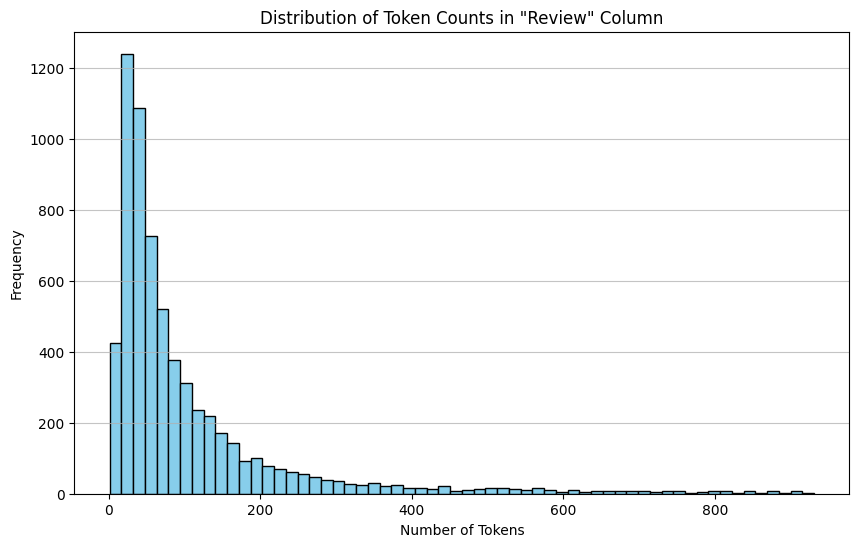

In [71]:
df['Token_Count'] = df['Review'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
plt.hist(df['Token_Count'], bins=60, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Counts in "Review" Column')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

A quantidade média de tokens das amostras é aproximadamente 96 tokens.

In [72]:
df['Token_Count'].mean()

105.3679012345679

In [73]:
df.head()

,Movie name,Review,Created at,Score,Genre,Token_Count
0,Arrival,"[denis, villeneuve, shows, us, all, his, talent, in, this, film, which, is, for, me, his, best, science, fiction, is, used, in, the, best, way, i, have, rarely, been, so, taken, by, the, mystery, of, a, film, during, my, first, cinema, session]","OCT 3, 2022",1.0,Mistery,41
1,Arrival,"[amy, adams, gives, a, superb, performance, in, what, could, be, called, independence, day, with, a, brain, denis, villeneuve, delivers, an, intentional, methodically, paced, script, with, the, sort, of, intelligence, nuance, and, confidence, that, feels, wholly, refreshing]","MAR 7, 2022",1.0,Mistery,36
2,Arrival,"[this, movie, is, not, for, everyone, if, you, wanted, a, science, fiction, action, blockbuster, then, you, will, be, disappointed, however, it, is, one, of, the, most, brilliant, plots, in, scifi, i, will, not, spoil, the, details, but, once, you, understand, the, twist, it, is, just, magnificent, it, is, a, movie, worth, to, discuss, with, friends, and, very, memorable, because, it, does, something, completely, different, the, ideas, for, follow, up, stories, are, basically, endless, it, is, based, on, the, book, the, story, of, her, life, if, i, am, correct, also, all, actors, were, the, right, choices, for, their, respected, rolls, i, ...]","DEC 6, 2019",1.0,Mistery,150
3,Arrival,"[arrival, is, one, of, my, favorite, sci, fi, movies, of, all, time, the, movie, does, not, need, flashy, action, sequences, or, superficial, drama, to, deliver, a, thoughtful, and, emotional, experience, even, the, plot, twist, if, you, may, call, it, that, is, in, clear, service, of, the, story, and, not, just, a, plot, twist, for, the, sake, of, it, arrival, manages, to, connect, with, me, every, time, i, watch, it, i, think, this, is, some, of, the, best, that, sci, fi, has, to, offer]","APR 3, 2020",1.0,Mistery,83
4,Arrival,"[i, do, not, think, this, movie, is, about, that, what, makes, us, human, personally, i, think, it, is, about, creating, your, own, reality, the, whole, movie, developes, around, the, ability, of, a, character, to, understand, a, language, in, a, way, adams, character, is, a, child, humanity, learning, to, speak, she, has, to, go, through, all, the, tribulations, of, learning, a, new, language, a, powerful, one, at, that, the, premise, is, quite, interesting, and, it, took, me, two, views, to, get, it, your, language, the, way, you, express, what, you, think, determines, your, reality, they, even, mention, it, at, the, beginning, ...]","MAR 2, 2020",1.0,Mistery,299


In [74]:
df = df.drop(columns=["Token_Count"])

In [78]:
df.to_csv("preprocessed-metacritics-total.csv",index=False)

In [77]:
%pwd

'/content/gdrive/.shortcut-targets-by-id/1ub11KA5pjUO4RCNqv5VFfBB4Tnv21ooN/Grupo 1 - Processamento de Linguagem Natural/Data'